<a href="https://colab.research.google.com/github/rraulison/b3/blob/main/raspagem_bovespa_indices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Script para raspagem do site da b3 obtendo o retorno dos índices (IBRX, IBRA, SMALL, etc)

In [14]:
!pip install -q selenium
!apt-get update
!apt install -q chromium-chromedriver

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.co

In [15]:
import pandas as pd
from time import sleep
from selenium import webdriver
from selenium.webdriver.common.by import By
import os
import calendar
import time

In [17]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd_chrome = webdriver.Chrome(options=chrome_options)

In [19]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC

In [21]:
#Baixa todos os arquivos a partir de 1998 a 2022 e renomeia para '1998.csv'
url = 'https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/indice-brasil-100-ibrx-100-estatisticas-historicas.htm'
wd_chrome.get(url)
iframe = wd_chrome.find_element(By.ID, value= "bvmf_iframe")    
wd_chrome.switch_to.frame(iframe)

for i in range(1998,2023): 

  WebDriverWait(wd_chrome, 20).until(EC.element_to_be_clickable((By.XPATH, '//*[@id="selectYear"]'))).send_keys(f'{i}')
  wd_chrome.switch_to.active_element
  WebDriverWait(wd_chrome, 20).until(EC.element_to_be_clickable((By.LINK_TEXT, 'Download (ano selecionado)')))
  down = wd_chrome.find_element(By.LINK_TEXT, value='Download (ano selecionado)')
  
  wd_chrome.execute_script("arguments[0].click();", down)
  time.sleep(1)
  while not os.path.isfile('/content/Evolucao_Diaria.csv'):
    time.sleep(1)
  os.rename('Evolucao_Diaria.csv', f'{i}.csv')

In [22]:
#cria uma lista com os nomes dos arquivos para iterar
arquivo = !ls -1t *.csv
arquivo = arquivo.sort()

In [23]:
lista = []

In [24]:
#itera em cada arquivo csv transformando a data para o formato datetime pandas
for i in arquivo:
  df = pd.read_csv(i, sep=';', encoding='ISO-8859-1', skipfooter=2, engine='python', thousands='.', decimal=',', header=1, index_col=False)
  df.columns = calendar.month_name[0:13]
  df1 = df.melt('', var_name='Date', value_name='ibrx')
  df1 = df1.dropna()
  df1.index = pd.to_datetime(i.rstrip('.csv') + df1.Date + df1.pop('').astype(str), format='%Y%B%d', errors='coerce')
  df1 = df1.drop(columns=['Date'])
  lista.append(df1)

In [25]:
ibrx = pd.concat(lista)

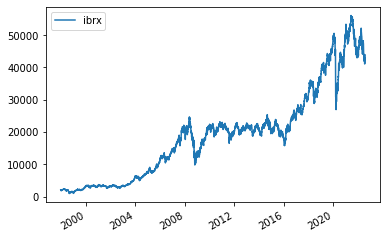

In [26]:
ibrx.plot()

In [27]:
ibrx

,ibrx
1998-01-02,2099.54
1998-01-05,2117.38
1998-01-06,2035.99
1998-01-07,1979.65
1998-01-08,1932.12
...,...
2022-07-22,42220.84
2022-07-25,42815.43
2022-07-26,42615.14
2022-07-27,43308.25
